# Datacamp [Manipulating DataFrames with pandas](https://www.datacamp.com/courses/manipulating-dataframes-with-pandas)

### Inspecting a DataFrame
When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- `.head()` returns the first few rows (the “head” of the DataFrame).
- `.info()` shows information on each of the columns, such as the data type and number of missing values.
- `.shape` returns the number of rows and columns of the DataFrame.
- `.describe()` calculates a few summary statistics for each column.

`homelessness` is a DataFrame containing estimates of `homelessness` in each U.S. state in 2018. The `individual` column is the number of homeless individuals not part of a family with children. The `family_members` column is the number of homeless individuals part of a family with children. The `state_pop` column is the state's total population.

In [1]:
import pandas as pd
homelessness = pd.read_csv('homelessness.csv')
print(homelessness.head())

FileNotFoundError: [Errno 2] No such file or directory: 'homelessness.csv'

## Indexing a Dataframe
- With a dataframe `df`, we would do a simple lookup like this `df['column_label']['row_label']`. This will return a value at the intersection of those two references.
- We can also lookup with an attribute if the labels are valid Python identifiers. This method looks like this `df.column_label['row_label']`.
- the `.loc` and `.iloc` accessors
    - both accessors use `df.loc['row_specifier', 'column_specifier']` as their syntax.

```python
# Import pandas
import pandas as pd

# Read in filename and set the index: election
election = pd.read_csv (filename, index_col='county')

# Create a separate dataframe with the columns ['winner', 'total', 'voters']: results
results = election[['winner', 'total', 'voters']]

# Print the output of results.head()
print(results.head())
```

## Slicing Dataframes
- A pandas series is a 1D array with labelled index. Like a hybrid between a np.array and a dictionary. 
- Another way to think of a DataFrame is a 2D array with series as the columns, sharing common row labels.

In [4]:
import pandas as pd
election = pd.read_csv('pennsylvania2012_turnout.csv', index_col='county')
p_counties = election.loc['Perry':'Potter']
print(p_counties)

             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Perry           PA   18240  29.769737  68.591009  Romney    27245  66.948064   
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197  59.461407   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   

                 margin  
county                   
Perry         38.821272  
Philadelphia  71.172800  
Pike          10.978242  
Potter        45.898681  


In [5]:
# Slice the row labels 'Potter' to 'Perry' in reverse order: p_counties_rev
p_counties_rev = election.loc['Potter':'Perry':-1]

# Print the p_counties_rev DataFrame
print(p_counties_rev)

             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197  59.461407   
Perry           PA   18240  29.769737  68.591009  Romney    27245  66.948064   

                 margin  
county                   
Potter        45.898681  
Pike          10.978242  
Philadelphia  71.172800  
Perry         38.821272  


In [6]:
# Slice the columns from the starting column to 'Obama': left_columns
left_columns = election.loc[:,:'Obama']

# Print the output of left_columns.head()
print(left_columns.head())

# Slice the columns from 'Obama' to 'winner': middle_columns
middle_columns = election.loc[:,'Obama':'winner']

# Print the output of middle_columns.head()
print(middle_columns.head())

# Slice the columns from 'Romney' to the end: 'right_columns'
right_columns = election.loc[:,'Romney':]

# Print the output of right_columns.head()
print(right_columns.head())


          state   total      Obama
county                            
Adams        PA   41973  35.482334
Allegheny    PA  614671  56.640219
Armstrong    PA   28322  30.696985
Beaver       PA   80015  46.032619
Bedford      PA   21444  22.057452
               Obama     Romney  winner
county                                 
Adams      35.482334  63.112001  Romney
Allegheny  56.640219  42.185820   Obama
Armstrong  30.696985  67.901278  Romney
Beaver     46.032619  52.637630  Romney
Bedford    22.057452  76.986570  Romney
              Romney  winner  voters    turnout     margin
county                                                    
Adams      63.112001  Romney   61156  68.632677  27.629667
Allegheny  42.185820   Obama  924351  66.497575  14.454399
Armstrong  67.901278  Romney   42147  67.198140  37.204293
Beaver     52.637630  Romney  115157  69.483401   6.605012
Bedford    76.986570  Romney   32189  66.619031  54.929118


In [7]:
# Create the list of row labels: rows
rows = ['Philadelphia', 'Centre', 'Fulton']

# Create the list of column labels: cols
cols = ['winner', 'Obama', 'Romney']

# Create the new DataFrame: three_counties
three_counties = election.loc[rows,cols]

# Print the three_counties DataFrame
print(three_counties)

              winner      Obama     Romney
county                                    
Philadelphia   Obama  85.224251  14.051451
Centre        Romney  48.948416  48.977486
Fulton        Romney  21.096291  77.748861


## Filtering DataFrames
- Selections using a Boolean Series is called filtering.

```python
df[df.column > 60]

#or

some_var = df.column > 60
df[some_var]
```

## Combining filters
- AND

```python
df[(df.column >= 50) & (df.column2 < 200)]

# OR

df[(df.column >= 50) | (df.column2 < 200)]
```
- parenthesis are used to force order of operations

- DataFrames with zeros and NaNs

```python
df2.loc[:, df2.all()]
df2.loc[:, df2.any()]

df.loc[:, df.isnull().any()]
df.loc[:, df.notnull().all()]

df.dropna(how='any')
# how='all' will keep columns with some none NaN values.

df.column[df.column2 > 55] += 5
```

In [10]:
# Create the boolean array: high_turnout
high_turnout = election.turnout > 70

# Filter the election DataFrame with the high_turnout array: high_turnout_df
high_turnout_df = election[high_turnout]

# Print the high_turnout_results DataFrame
print(high_turnout_df)

             state   total      Obama     Romney  winner  voters    turnout  \
county                                                                        
Bucks           PA  319407  49.966970  48.801686   Obama  435606  73.324748   
Butler          PA   88924  31.920516  66.816607  Romney  122762  72.436096   
Chester         PA  248295  49.228539  49.650617  Romney  337822  73.498766   
Forest          PA    2308  38.734835  59.835355  Romney    3232  71.410891   
Franklin        PA   62802  30.110506  68.583803  Romney   87406  71.850903   
Montgomery      PA  401787  56.637223  42.286834   Obama  551105  72.905708   
Westmoreland    PA  168709  37.567646  61.306154  Romney  238006  70.884347   

                 margin  
county                   
Bucks          1.165284  
Butler        34.896091  
Chester        0.422079  
Forest        21.100520  
Franklin      38.473297  
Montgomery    14.350390  
Westmoreland  23.738508  


In [11]:
# Import numpy
import numpy as np

# Create the boolean array: too_close
too_close = election.margin < 1

# Assign np.nan to the 'winner' column where the results were too close to call
election.winner[too_close] = np.nan

# Print the output of election.info()
print(election.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
state      67 non-null object
total      67 non-null int64
Obama      67 non-null float64
Romney     67 non-null float64
winner     64 non-null object
voters     67 non-null int64
turnout    67 non-null float64
margin     67 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 7.2+ KB
None


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
titanic = pd.read_csv('titanic.csv')

In [14]:
# Select the 'age' and 'cabin' columns: df
df = titanic[['age', 'cabin']]

# Print the shape of df
print(df.shape)

# Drop rows in df with how='any' and print the shape
print(df.dropna(how='any').shape)

# Drop rows in df with how='all' and print the shape
print(df.dropna(how='all').shape)

# Drop columns in titanic with less than 1000 non-missing values
print(titanic.dropna(thresh=1000, axis='columns').info())

(1309, 2)
(272, 2)
(1069, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB
None


In [16]:
weather = pd.read_csv('pittsburgh2013.csv')
print(weather.head())
print(weather.columns)

       Date  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0  2013-1-1                32                 28                21   
1  2013-1-2                25                 21                17   
2  2013-1-3                32                 24                16   
3  2013-1-4                30                 28                27   
4  2013-1-5                34                 30                25   

   Max Dew PointF  Mean Dew PointF  Min DewpointF  Max Humidity  \
0              30               27             16           100   
1              14               12             10            77   
2              19               15              9            77   
3              21               19             17            75   
4              23               20             16            75   

   Mean Humidity  Min Humidity       ...        Max VisibilityMiles  \
0             89            77       ...                         10   
1             67            55    

## Transforming DataFrames
- The best practice is to use methods that are inherant to a pandas DataFrame
- Next best is using numpy universal functions to transform entire columns of data elementwise
- `df.floordiv(12)` is an example of transforming a column by computing the numbers in dozens
- `np.floor_div(df, 12)` is the same result using numpy strategies

```python
def dozens(n):
    return n/12
df.apply(dozens)
```

- The previous example uses a python function and the DataFrame apply method to achieve the same thing
- `df.apply(lambda n: n//12)` will acheive the same result using a lambda function

### Storing a transformation
- `df['new_column'] = df.column.floordiv(12)`

### String operations
- **`.str` is a handy accessor for vectorized string transformations**
- `df.index = df.index.str.upper()` will result in all uppercase indices
- For the index, there is no `apply()` method. There is an equal (and unfortunately alternately named) `map()` method
- `df.index = df.index.map(str.lower)` is an example of how to use the `map()` method to transform a set of indices to all lowercase
- Many arithmetic operations work directly on DataFrames. For example, `df['column_1+2'] = df.column1 + df.column2`

In [23]:
# Write a function to convert degrees Fahrenheit to degrees Celsius: to_celsius
def to_celsius(F):
    return 5/9*(F - 32)

# Apply the function over 'Mean TemperatureF' and 'Mean Dew PointF': df_celsius
df_celsius = weather[['Mean TemperatureF','Mean Dew PointF']].apply(to_celsius)

# Reassign the columns df_celsius
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

# Print the output of df_celsius.head()
print(df_celsius.head())

   Mean TemperatureC  Mean Dew PointC
0          -2.222222        -2.777778
1          -6.111111       -11.111111
2          -4.444444        -9.444444
3          -2.222222        -7.222222
4          -1.111111        -6.666667


In [24]:
election = pd.read_csv('pennsylvania2012_turnout.csv')

In [25]:
# Create the dictionary: red_vs_blue
red_vs_blue = {'Obama':'blue', 'Romney':'red'}

# Use the dictionary to map the 'winner' column to the new column: election['color']
election['color'] = election.winner.map(red_vs_blue)

# Print the output of election.head()
print(election.head())

      county state   total      Obama     Romney  winner  voters    turnout  \
0      Adams    PA   41973  35.482334  63.112001  Romney   61156  68.632677   
1  Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
2  Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
3     Beaver    PA   80015  46.032619  52.637630  Romney  115157  69.483401   
4    Bedford    PA   21444  22.057452  76.986570  Romney   32189  66.619031   

      margin color  
0  27.629667   red  
1  14.454399  blue  
2  37.204293   red  
3   6.605012   red  
4  54.929118   red  


When **performance** is paramount, you should avoid using `.apply()` and `.map()` because those constructs perform Python for-loops over the data stored in a pandas Series or DataFrame.

- *By using vectorized functions instead, you can loop over the data at the same speed as compiled code!*

#### Terminology:
- A z-score is the number of standard deviations by which an observation is above the mean - so if it is negative, it means the observation is below the mean.

In [27]:
# Import zscore from scipy.stats
from scipy.stats import zscore

# Call zscore with election['turnout'] as input: turnout_zscore
turnout_zscore = zscore(election['turnout'])

# Print the type of turnout_zscore
print(type(turnout_zscore))

# Assign turnout_zscore to a new column: election['turnout_zscore']
election['turnout_zscore'] = turnout_zscore

# Print the output of election.head()
print(election.head())

<class 'numpy.ndarray'>
      county state   total      Obama     Romney  winner  voters    turnout  \
0      Adams    PA   41973  35.482334  63.112001  Romney   61156  68.632677   
1  Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
2  Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
3     Beaver    PA   80015  46.032619  52.637630  Romney  115157  69.483401   
4    Bedford    PA   21444  22.057452  76.986570  Romney   32189  66.619031   

      margin color  turnout_zscore  
0  27.629667   red        0.853734  
1  14.454399  blue        0.439846  
2  37.204293   red        0.575650  
3   6.605012   red        1.018647  
4  54.929118   red        0.463391  


## Pandas index objects and labeled data
- creating a series:

```python
import pandas as pd
prices = [10.70, 10.86, 10.74]
shares = pd.Series(prices)
print(shares)
```

- The output of the print function will be the values coupled to a column of integer indexes which act as labels.

```python
days = ['Mon', 'Tue', 'Wed']
shares = pd.Series(prices, index=days)
print(shares)
```

- Now the indexes of the Series are the string data from days.
- `shares.index.name = 'weekday'` associates the name 'weekday' to the list of indexes.
- Assigning the index (example):

```python
unemployment.index = unemployment['Zip']
unemployment.head()

# Removing extra column
del unemployment['Zip']
```

In [28]:
sales = pd.read_csv('sales.csv', index_col='month')

In [29]:
# Create the list of new indexes: new_idx
new_idx = [i.upper() for i in sales.index]

# Assign new_idx to sales.index
sales.index = new_idx

# Print the sales DataFrame
print(sales)

     eggs  salt  spam
JAN    47  12.0    17
FEB   110  50.0    31
MAR   221  89.0    72
APR    77  87.0    20
MAY   132   NaN    52
JUN   205  60.0    55


In [30]:
# Assign the string 'MONTHS' to sales.index.name
sales.index.name = 'MONTHS'

# Print the sales DataFrame
print(sales)

# Assign the string 'PRODUCTS' to sales.columns.name 
sales.columns.name = 'PRODUCTS'

# Print the sales dataframe again
print(sales)

        eggs  salt  spam
MONTHS                  
JAN       47  12.0    17
FEB      110  50.0    31
MAR      221  89.0    72
APR       77  87.0    20
MAY      132   NaN    52
JUN      205  60.0    55
PRODUCTS  eggs  salt  spam
MONTHS                    
JAN         47  12.0    17
FEB        110  50.0    31
MAR        221  89.0    72
APR         77  87.0    20
MAY        132   NaN    52
JUN        205  60.0    55


In [31]:
# Generate the list of months: months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Assign months to sales.index
sales.index = months

# Print the modified sales DataFrame
print(sales)

PRODUCTS  eggs  salt  spam
Jan         47  12.0    17
Feb        110  50.0    31
Mar        221  89.0    72
Apr         77  87.0    20
May        132   NaN    52
Jun        205  60.0    55


## Hierarchical Indexing (MultiIndexing)
- Some data requires more than one index. Stock data representing three different stocks over three days can have the ticket label (AAPL) and the date (2016-10-03) both as labels.
- `stocks = stocks.set_index(['Symbol', 'Date'])`
- To output the names of the indexes we now need `print(stocks.index.names)`
- `stocks = stocks.sort_index()` now provides a sorted and readable output of the stock data for each ticket label
- Extracting values from a hierarchical table
    - `stocks.loc[('CSCO', '2016-10-04')]` returns the full record for that index tuple
    - `stocks.loc[('CSCO', '2016-10-04'), 'Volume']` returns a single value for that reference
- Calling the `stocks.loc['AAPL']` slices the outer index and returns all the AAPL records
- We can also perform a range slice `stocks.loc['CSCO':'MSFT']`
- `stocks.loc[(['AAPL', 'MSFT'], '2016-10-05'), :]`
- `stocks.loc[(['AAPL', 'MSFT'], '2016-10-05'), 'Close']`
- `stocks.loc[('CSCO', ['2016-10-05', '2016-10-03']), :]`
- `stocks.loc[(slice(None), slice('2016-10-03', '2016-10-04')), :]`

In [32]:
sales = pd.read_csv('sales1.csv', index_col=['state', 'month'])

In [33]:
print(sales)

             eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55


In [34]:
# Print sales.loc[['CA', 'TX']]
print(sales.loc[['CA', 'TX']])

# Print sales['CA':'TX']
print(sales['CA':'TX'])

             eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
TX    1       132   NaN    52
      2       205  60.0    55
             eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55


In [35]:
sales = pd.read_csv('sales1.csv')

In [36]:
print(sales)

  state  month  eggs  salt  spam
0    CA      1    47  12.0    17
1    CA      2   110  50.0    31
2    NY      1   221  89.0    72
3    NY      2    77  87.0    20
4    TX      1   132   NaN    52
5    TX      2   205  60.0    55


In [37]:
# Set the index to be the columns ['state', 'month']: sales
sales = sales.set_index(['state', 'month'])

# Sort the MultiIndex: sales
sales = sales.sort_index()

# Print the sales DataFrame
print(sales)

             eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55


In [39]:
sales = pd.read_csv('sales1.csv')

# Set the index to the column 'state': sales
sales = sales.set_index(['state'])

# Print the sales DataFrame
print(sales)

# Access the data from 'NY'
print(sales.loc['NY'])

       month  eggs  salt  spam
state                         
CA         1    47  12.0    17
CA         2   110  50.0    31
NY         1   221  89.0    72
NY         2    77  87.0    20
TX         1   132   NaN    52
TX         2   205  60.0    55
       month  eggs  salt  spam
state                         
NY         1   221  89.0    72
NY         2    77  87.0    20


### Looking up data on the inner levels of a `MultiIndex`

- The trickiest of all these lookups are when you want to access some inner levels of the index. In this case, you need to use slice(None) in the slicing parameter for the outermost dimension(s) instead of the usual :, or use pd.IndexSlice.

- [Pandas Docs](http://pandas.pydata.org/pandas-docs/stable/advanced.html)

In [40]:
sales = pd.read_csv('sales1.csv', index_col=['state', 'month'])

In [43]:
print(sales)

             eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55


In [49]:
# Look up data for NY in month 1: NY_month1
NY_month1 = sales.loc[('NY', 1)]
print(NY_month1)

eggs    221.0
salt     89.0
spam     72.0
Name: (NY, 1), dtype: float64


In [52]:
# Look up data for CA and TX in month 2: CA_TX_month2
CA_TX_month2 = sales.loc[(['CA', 'TX'], 2), :]
print(CA_TX_month2)

             eggs  salt  spam
state month                  
CA    2       110  50.0    31
TX    2       205  60.0    55


In [57]:
# Look up data for all states in month 2: all_month2
all_month2 = sales.loc[(slice(None), 2), :]
print(all_month2)

             eggs  salt  spam
state month                  
CA    2       110  50.0    31
NY    2        77  87.0    20
TX    2       205  60.0    55


## Pivoting Data

```python
trials.pivot(index='treatment',
             columns='gender',
             values='response')
```

- If you don't specify the values, then the resulting DataFrame has MultiIndex columns with all remaining values stratafied by the column labels.

In [58]:
users = pd.read_csv('users.csv')
print(users)

   Unnamed: 0 weekday    city  visitors  signups
0           0     Sun  Austin       139        7
1           1     Sun  Dallas       237       12
2           2     Mon  Austin       326        3
3           3     Mon  Dallas       456        5


In [59]:
# Pivot the users DataFrame: visitors_pivot
visitors_pivot = users.pivot(index='weekday', columns='city', values='visitors')

# Print the pivoted DataFrame
print(visitors_pivot)

city     Austin  Dallas
weekday                
Mon         326     456
Sun         139     237


In [60]:
# Pivot users with signups indexed by weekday and city: signups_pivot
signups_pivot = users.pivot(index='weekday', columns='city', values='signups')

# Print signups_pivot
print(signups_pivot)

# Pivot users pivoted by both signups and visitors: pivot
pivot = users.pivot(index='weekday', columns='city')

# Print the pivoted DataFrame
print(pivot)

city     Austin  Dallas
weekday                
Mon           3       5
Sun           7      12
        Unnamed: 0        visitors        signups       
city        Austin Dallas   Austin Dallas  Austin Dallas
weekday                                                 
Mon              2      3      326    456       3      5
Sun              0      1      139    237       7     12


## Unstacking a Multi-index
- Because MultiIndex DataFrames will not pivot, we may need to move some of the index data to columns.
- We do this with the `unstack()` method.

```python
trials.unstack(level='gender')
```

```python
trials.stack(level='gender')
```

- To swap levels you use the `swaplevel()` method.

```python
swapped = stacked.swaplevel(0, 1)
```

- To sort the index:

```python
sorted_trials = swapped.sort_index()
```

In [83]:
users = pd.read_csv('users.csv', index_col=0)
print(users)

  weekday    city  visitors  signups
0     Sun  Austin       139        7
1     Sun  Dallas       237       12
2     Mon  Austin       326        3
3     Mon  Dallas       456        5


In [84]:
users = users.set_index(['weekday', 'city'])
print(users.index)
print(users)

MultiIndex(levels=[['Mon', 'Sun'], ['Austin', 'Dallas']],
           labels=[[1, 1, 0, 0], [0, 1, 0, 1]],
           names=['weekday', 'city'])
                visitors  signups
weekday city                     
Sun     Austin       139        7
        Dallas       237       12
Mon     Austin       326        3
        Dallas       456        5


In [86]:
# Unstack users by 'weekday': byweekday
byweekday = users.unstack(level='city')

# Print the byweekday DataFrame
print(byweekday)

        visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12


In [87]:
# Stack byweekday by 'weekday' and print it
print(byweekday.stack(level='city'))

                visitors  signups
weekday city                     
Mon     Austin       326        3
        Dallas       456        5
Sun     Austin       139        7
        Dallas       237       12


In [88]:
# Unstack users by 'city': bycity
bycity = users.unstack(level='city')

# Print the bycity DataFrame
print(bycity)

# Stack bycity by 'city' and print it
print(bycity.stack(level='city'))

        visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12
                visitors  signups
weekday city                     
Mon     Austin       326        3
        Dallas       456        5
Sun     Austin       139        7
        Dallas       237       12


In [89]:
# Stack 'city' back into the index of bycity: newusers
newusers = bycity.stack('city')

# Swap the levels of the index of newusers: newusers
newusers = newusers.swaplevel(0, 1)

# Print newusers and verify that the index is not sorted
print(newusers)

# Sort the index of newusers: newusers
newusers = newusers.sort_index()

# Print newusers and verify that the index is now sorted
print(newusers)

# Verify that the new DataFrame is equal to the original
print(newusers.equals(users))

                visitors  signups
city   weekday                   
Austin Mon           326        3
Dallas Mon           456        5
Austin Sun           139        7
Dallas Sun           237       12
                visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12
False


## Melting DataFrames
- Melting a DataFrame will return pivoted data back to its original record specific form:

```python
pd.melt(new_trials)
```

- To specify the columns that we want to remain in the resulting DataFrame:

```python
pd.melt(new_trials, id_vars=['treatment'])

# And specify the values for a separate column:
pd.melt(new_trials, id_vars=['treatment'], value_vars=['F', 'M'])

# Be specific with column specifiers:
pd.melt(new_trials, id_vars=['treatment'], var_name='gender', value_name='response')
```

In [94]:
users = pd.read_csv('users.csv', index_col=0)
print(users)

  weekday    city  visitors  signups
0     Sun  Austin       139        7
1     Sun  Dallas       237       12
2     Mon  Austin       326        3
3     Mon  Dallas       456        5


In [97]:
visitors_by_city_weekday = users.pivot(index='weekday', columns='city', values='visitors')
print(visitors_by_city_weekday)

city     Austin  Dallas
weekday                
Mon         326     456
Sun         139     237


In [98]:
# Reset the index: visitors_by_city_weekday
visitors_by_city_weekday = visitors_by_city_weekday.reset_index()

# Print visitors_by_city_weekday
print(visitors_by_city_weekday)

# Melt visitors_by_city_weekday: visitors
visitors = pd.melt(visitors_by_city_weekday, id_vars='weekday', value_name='visitors')

# Print visitors
print(visitors)

city weekday  Austin  Dallas
0        Mon     326     456
1        Sun     139     237
  weekday    city  visitors
0     Mon  Austin       326
1     Sun  Austin       139
2     Mon  Dallas       456
3     Sun  Dallas       237


In [99]:
print(users)

  weekday    city  visitors  signups
0     Sun  Austin       139        7
1     Sun  Dallas       237       12
2     Mon  Austin       326        3
3     Mon  Dallas       456        5


**Define a DataFrame skinny where you melt the 'visitors' and 'signups' columns of users into a single column.**

In [100]:
# Melt users: skinny
skinny = pd.melt(users, id_vars=['weekday', 'city'])

# Print skinny
print(skinny)

  weekday    city  variable  value
0     Sun  Austin  visitors    139
1     Sun  Dallas  visitors    237
2     Mon  Austin  visitors    326
3     Mon  Dallas  visitors    456
4     Sun  Austin   signups      7
5     Sun  Dallas   signups     12
6     Mon  Austin   signups      3
7     Mon  Dallas   signups      5


In [105]:
users = pd.read_csv('users.csv', index_col=0)
users

weekday    city  visitors  signups
0     Sun  Austin       139        7
1     Sun  Dallas       237       12
2     Mon  Austin       326        3
3     Mon  Dallas       456        5

In [106]:
# Set the new index: users_idx
users_idx = users.set_index(['city', 'weekday'])

# Print the users_idx DataFrame
print(users_idx)

# Obtain the key-value pairs: kv_pairs
kv_pairs = pd.melt(users_idx, col_level=0)

# Print the key-value pairs
print(kv_pairs)

                visitors  signups
city   weekday                   
Austin Sun           139        7
Dallas Sun           237       12
Austin Mon           326        3
Dallas Mon           456        5
   variable  value
0  visitors    139
1  visitors    237
2  visitors    326
3  visitors    456
4   signups      7
5   signups     12
6   signups      3
7   signups      5


## Pivot Tables
- `pivot()` require unique index column pairs to identify values in the new table
- `pivot_table()` method reshapes a DataFrame in much the same way as `pivot()` by summarizing the data with a pair of summarizing variables and their values. Pivot tables deal with the same index column pair using a **reduction**. 

```python
more_trials.pivot_table(index='treatment', columns='gender', values='response', aggfunc='count')
```

- By default the reduction is an average. 
- Other aggregations are possible through the keyword argument `aggfunc=''`.
- Using count with `aggfunc` will summarize the data and create a *frequency table*.

In [108]:
users = pd.read_csv('users.csv', index_col=0)
users

weekday    city  visitors  signups
0     Sun  Austin       139        7
1     Sun  Dallas       237       12
2     Mon  Austin       326        3
3     Mon  Dallas       456        5

In [109]:
# Create the DataFrame with the appropriate pivot table: by_city_day
by_city_day = users.pivot_table(index='weekday', columns='city')

# Print by_city_day
print(by_city_day)

        signups        visitors       
city     Austin Dallas   Austin Dallas
weekday                               
Mon           3      5      326    456
Sun           7     12      139    237


In [110]:
users = pd.read_csv('users.csv', index_col=0)
users

# Use a pivot table to display the count of each column: count_by_weekday1
count_by_weekday1 = users.pivot_table(index='weekday', aggfunc='count')

# Print count_by_weekday
print(count_by_weekday1)

# Replace 'aggfunc='count'' with 'aggfunc=len': count_by_weekday2
count_by_weekday2 = users.pivot_table(index='weekday', aggfunc=len)

# Verify that the same result is obtained
print('==========================================')
print(count_by_weekday1.equals(count_by_weekday2))


         city  signups  visitors
weekday                         
Mon         2        2         2
Sun         2        2         2
True


- Sometimes it's useful to add totals in the margins of a pivot table. You can do this with the argument margins=True. In this exercise, you will practice using margins in a pivot table along with a new aggregation function: sum.

In [111]:
# Load users DataFrame
users = pd.read_csv('users.csv', index_col=0)
print(users)

# Create the DataFrame with the appropriate pivot table: signups_and_visitors
signups_and_visitors = users.pivot_table(index='weekday', aggfunc=sum)

# Print signups_and_visitors
print(signups_and_visitors)

# Add in the margins: signups_and_visitors_total 
signups_and_visitors_total = users.pivot_table(index='weekday', aggfunc=sum, margins=True)

# Print signups_and_visitors_total
print(signups_and_visitors_total)

  weekday    city  visitors  signups
0     Sun  Austin       139        7
1     Sun  Dallas       237       12
2     Mon  Austin       326        3
3     Mon  Dallas       456        5
         signups  visitors
weekday                   
Mon            8       782
Sun           19       376
         signups  visitors
weekday                   
Mon            8       782
Sun           19       376
All           27      1158


## Categoricals and groupby
- We could count through boolean filtering:

```python
sales.loc[sales['weekday'] == 'Sun'].count()
```

**Alternatively, we can groupby and then count for each distinct value found:**

```python
sales.groupby('weekday').count()
```

- Remember that the count() method is an *Aggregation/Reduction* because it converts many values to a single value.
- We can select one or more columns over which to perform the aggregation:

```python
sales.groupby('weekday')['bread'].sum()

# For multiple columns we use a list in the bracket call:
sales.groupby('weekday')[['bread','butter']].sum()
```

- We can also groupby and mean for multi-level index:

```python
cales.groupby(['city','weekday']).mean()
```

- We can add a series to the DataFrame for additional information and then use the data for aggregation:

```python
customers = pd.Series(['Dave', 'Alice', 'Bob', 'Alice'])
sales.groupby(customers)['bread'].sum()
```

### Categoricals

```python
# To see the unique values in a factor column:
sales['weekday'].unique()

# Convert the factors column to data type 'category':
sales['weekday'] = sales['weekday'].astype('category')
```

- Categoricals have advantages over a list of values:
    - They use less memory
    - Speed up operations like `groupby()`
    - Use separate lookup tables to achieve these outcomes

In [112]:
# Load the titanic dataset
titanic = pd.read_csv('titanic.csv')

# the 'embarked' column indicates at which of the 
# three ports the passenger boarded the Titanic. 
# 'S' stands for Southampton, England, 
# 'C' for Cherbourg, France and 'Q' for Queenstown, Ireland.

# Group titanic by 'pclass'
by_class = titanic.groupby('pclass')

# Aggregate 'survived' column of by_class by count
count_by_class = by_class['survived'].count()

# Print count_by_class
print(count_by_class)

# Group titanic by 'embarked' and 'pclass'
by_mult = titanic.groupby(['embarked','pclass'])

# Aggregate 'survived' column of by_mult by count
count_mult = by_mult['survived'].count()

# Print count_mult
print(count_mult)

pclass
1    323
2    277
3    709
Name: survived, dtype: int64
embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64


In [115]:
life_fname = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/life_expectancy.csv'
regions_fname = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/regions.csv'

# Read life_fname into a DataFrame: life
life = pd.read_csv(life_fname, index_col='Country')

# Read regions_fname into a DataFrame: regions
regions = pd.read_csv(regions_fname, index_col='Country')

# Group life by regions['region']: life_by_region
life_by_region = life.groupby(regions['region'])

# Print the mean over the '2010' column of life_by_region
print(life_by_region['2010'].mean())

region
America                       74.037350
East Asia & Pacific           73.405750
Europe & Central Asia         75.656387
Middle East & North Africa    72.805333
South Asia                    68.189750
Sub-Saharan Africa            57.575080
Name: 2010, dtype: float64


## Groupby and aggregation
- Another example:

```python
sales.groupby('city')[['bread','butter']].max()
```

- We can perform multiple aggregations for each column using the `agg()` function:

```python
sales.groupby('city')[['bread','butter']].agg(['max','sum'])
```

- We can use the `agg()` function to pass `sum()`, `mean()`, and `count()` for example.
- It also accepts user defined functions and libary functions

```python
def data_range(series):
    return series.max() - series.min()

sales.groupby('weekday')[['bread','butter']].agg(data_range)

# Custom aggregation: dictionaries
sales.groupby(customers)[['bread','butter']].agg({'bread':'sum', 'butter':data_range})
```

In [116]:
# Group titanic by 'pclass': by_class
by_class = titanic.groupby('pclass')

# Select 'age' and 'fare'
by_class_sub = by_class[['age','fare']]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_class_sub.agg(['max','median'])

# Print the maximum age in each class
print(aggregated.loc[:, ('age','max')])

# Print the median fare in each class
print(aggregated.loc[:, ('fare','median')])

pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64
pclass
1    60.0000
2    15.0458
3     8.0500
Name: (fare, median), dtype: float64


In [117]:
# Read the CSV file into a DataFrame and sort the index: gapminder
gapminder = pd.read_csv('gapminder.csv', index_col=['Year','region','Country'])
gapminder = gapminder.sort_index()

# Group gapminder by 'Year' and 'region': by_year_region
by_year_region = gapminder.groupby(level=['Year','region'])

# Define the function to compute spread: spread
def spread(series):
    return series.max() - series.min()

# Create the dictionary: aggregator
aggregator = {'population':'sum', 'child_mortality':'mean', 'gdp':spread}

# Aggregate by_year_region using the dictionary: aggregated
aggregated = by_year_region.agg(aggregator)

# Print the last 6 entries of aggregated 
print(aggregated.tail(6))

                                   population  child_mortality       gdp
Year region                                                             
2013 America                     9.629087e+08        17.745833   49634.0
     East Asia & Pacific         2.244209e+09        22.285714  134744.0
     Europe & Central Asia       8.968788e+08         9.831875   86418.0
     Middle East & North Africa  4.030504e+08        20.221500  128676.0
     South Asia                  1.701241e+09        46.287500   11469.0
     Sub-Saharan Africa          9.205996e+08        76.944490   32035.0


## My Attempt:

In [122]:
# Read file: sales
sales = pd.read_csv('sales-feb-2015.csv', index_col='Date', parse_dates=True)

# Create a groupby object: by_day
by_day = sales.index.strftime('%a')

# Create sum: units_sum
units_sum = sales.groupby(by_day).sum()

# Print units_sum
print(units_sum)

     Units
Mon     48
Sat      7
Thu     59
Tue     13
Wed     48


## Correct Answer:

In [123]:
# Read file: sales
sales = pd.read_csv('sales-feb-2015.csv', index_col='Date', parse_dates=True)

# Create a groupby object: by_day
by_day = sales.groupby(sales.index.strftime('%a'))

# Create sum: units_sum
units_sum = by_day['Units'].sum()

# Print units_sum
print(units_sum)

Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64


## Groupby and transformation
- How do we apply distinct transformations to distinct groups?
- Instead of aggregating after grouping, we can apply a transform method instead.
- This changes DataFrame entries according to a specified function inplace without changing the index.
- Example, let's compute a z-score:

```python
def zscore(series):
    return (series - series.mean()) / series.std()

# Looking for MPG ratings per year, transformed by z-score
auto.groupby('yr')['mpg'].transform(zscore).head()
```

- When the data does not conform to the previously stated processes, we use apply

```python
def zscore_with_year_and_name(group):
    df = pd.DataFrame(
        {'mpg': zscore(group['mpg']),
         'year': group['yr'],
         'name': group['name']})
    return df

# This new function is too difficult for transform, so we use apply()
auto.groupby('yr').apply(zscore_with_year_and_name).head()
```

In [130]:
gapminder = pd.read_csv('gapminder.csv', index_col='Country')
gapminder = gapminder.sort_index()
gapminder_2010 = gapminder[gapminder['Year'] == 2010]

# Import zscore
from scipy.stats import zscore

# Group gapminder_2010: standardized
standardized = gapminder_2010.groupby('region')[['life','fertility']].transform(zscore)

# Construct a Boolean Series to identify outliers: outliers
outliers = (standardized['life'] < -3) | (standardized['fertility'] > 3)

# Filter gapminder_2010 by the outliers: gm_outliers
gm_outliers = gapminder_2010.loc[outliers]

# Print gm_outliers
print(gm_outliers)

             Year  fertility    life  population  child_mortality     gdp  \
Country                                                                     
Guatemala    2010      3.974  71.100  14388929.0             34.5  6849.0   
Haiti        2010      3.350  45.000   9993247.0            208.8  1518.0   
Tajikistan   2010      3.780  66.830   6878637.0             52.6  2110.0   
Timor-Leste  2010      6.237  65.952   1124355.0             63.8  1777.0   

                            region  
Country                             
Guatemala                  America  
Haiti                      America  
Tajikistan   Europe & Central Asia  
Timor-Leste    East Asia & Pacific  


# Remember:
## Many statistical and machine learning packages cannot determine the best action to take when missing data entries are encountered.

## Imputation: *filling in missing data*

In [131]:
# Create a groupby object: by_sex_class
by_sex_class = titanic.groupby(['sex','pclass'])

# Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())

# Impute age and assign to titanic['age']
titanic.age = by_sex_class['age'].transform(impute_median)

# Print the output of titanic.tail(10)
print(titanic.tail(10))

      pclass  survived                                     name     sex   age  \
1299       3         0                      Yasbeck, Mr. Antoni    male  27.0   
1300       3         1  Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0   
1301       3         0                     Youseff, Mr. Gerious    male  45.5   
1302       3         0                        Yousif, Mr. Wazli    male  25.0   
1303       3         0                    Yousseff, Mr. Gerious    male  25.0   
1304       3         0                     Zabour, Miss. Hileni  female  14.5   
1305       3         0                    Zabour, Miss. Thamine  female  22.0   
1306       3         0                Zakarian, Mr. Mapriededer    male  26.5   
1307       3         0                      Zakarian, Mr. Ortin    male  27.0   
1308       3         0                       Zimmerman, Mr. Leo    male  29.0   

      sibsp  parch  ticket     fare cabin embarked boat   body home.dest  
1299      1      0    2659  14.45

In [132]:
def disparity(gr):
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})

In [133]:
# Group gapminder_2010 by 'region': regional
regional = gapminder_2010.groupby('region')

# Apply the disparity function on regional: reg_disp
reg_disp = regional.apply(disparity)

# Print the disparity of 'United States', 'United Kingdom', and 'China'
print(reg_disp.loc[['United States','United Kingdom','China']])

                  z(gdp)  regional spread(gdp)
Country                                       
United States   3.013374               47855.0
United Kingdom  0.572873               89037.0
China          -0.432756               96993.0


## Groupby and filtering
- Computing mean review:

```python
auto.groupby('yr')['mpg'].mean()

# What is we want the average for only cars built by Chevy?
```
- We need to **filter** the groups before aggregating.

```python
splitting = auto.groupby('yr')
type(splitting.groups)
# dict
# The keys are the years and the values are the corresponding
# rows of the original DataFrame.

# We could iterate over the new splitting group
for group_name,group in splitting:
    avg = group['mpg'].mean()
    print(group_name, avg)

# We use the same looping technique but include a filter for Chev
for group_name,group in splitting:
    avg = group.loc[group['name'].str.contains('chevrolet'), 'mpg'].mean()
    print(group_name, avg)

# We can also use dictionary comprehension:
chevy_means = {year:group.loc[group['name'].str.contains('chevrolet'),'mpg'].mean for year,group in splitting}
pd.Series(chevy_means)

# Boolean groupby
chevy = auto['name']str.contains('chevrolet')
auto.groupby(['yr', chevy])['mpg'].mean()
```
- Using a multilevel groupby

In [134]:
print(titanic.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  


In [135]:
def c_deck_survival(gr):

    c_passengers = gr['cabin'].str.startswith('C').fillna(False)

    return gr.loc[c_passengers, 'survived'].mean()

In [136]:
# Create a groupby object using titanic over the 'sex' column: by_sex
by_sex = titanic.groupby('sex')

# Call by_sex.apply with the function c_deck_survival
c_surv_by_sex = by_sex.apply(c_deck_survival)

# Print the survival rates
print(c_surv_by_sex)

sex
female    0.913043
male      0.312500
dtype: float64


In [137]:
print(sales.head())

                             Company   Product  Units
Date                                                 
2015-02-02 08:30:00            Hooli  Software      3
2015-02-02 21:00:00        Mediacore  Hardware      9
2015-02-03 14:00:00          Initech  Software     13
2015-02-04 15:30:00        Streeplex  Software     13
2015-02-04 22:00:00  Acme Coporation  Hardware     14


In [138]:
# Group sales by 'Company': by_company
by_company = sales.groupby('Company')

# Compute the sum of the 'Units' of by_company: by_com_sum
by_com_sum = by_company['Units'].sum()
print(by_com_sum)

# Filter 'Units' where the sum is > 35: by_com_filt
by_com_filt = by_company.filter(lambda g:g['Units'].sum() > 35)
print(by_com_filt)


Company
Acme Coporation    34
Hooli              30
Initech            30
Mediacore          45
Streeplex          36
Name: Units, dtype: int64
                       Company   Product  Units
Date                                           
2015-02-02 21:00:00  Mediacore  Hardware      9
2015-02-04 15:30:00  Streeplex  Software     13
2015-02-09 09:00:00  Streeplex   Service     19
2015-02-09 13:00:00  Mediacore  Software      7
2015-02-19 11:00:00  Mediacore  Hardware     16
2015-02-19 16:00:00  Mediacore   Service     10
2015-02-21 05:00:00  Mediacore  Software      3
2015-02-26 09:00:00  Streeplex   Service      4


In [139]:
# Create the Boolean Series: under10
under10 = titanic['age'] < 10
under10 = under10.map({True:'under 10', False:'over 10'})

# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10)['survived'].mean()
print(survived_mean_1)

# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby([under10, 'pclass'])['survived'].mean()
print(survived_mean_2)

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64
age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64


# Case Study
## Olymipic Medals

**We will use:**

- Filtering and indexing
    - One-level indexing
    - Multi-level indexing
- Reshaping DataFrames and `pivot()`
- `pivot_table()`

- Groupby
    - Useful DataFrame methods
    - `unique()`
    - `value_counts()`
- Aggregations, transformations, filtering

In [140]:
medals = pd.read_csv('all_medalists.csv')
medals.head()

City  Edition     Sport Discipline             Athlete  NOC Gender  \
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver

In [141]:
# Select the 'NOC' column of medals: country_names
country_names = medals.NOC

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


In [142]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


## Slicing and Filtering
- Indexing and slicing
    - `.loc[]` and `.iloc[]` accessors
- Filtering
    - Selecting by Boolean Seeries
    - Filtering null/non-null and zero/non-zero values
### Handling categorical data
- Useful DataFrame methods for handling categorical data:
    - `value_counts()`
    - `unique()`
    - `groupby()`
- `groupby()` aggregations:
    - `mean()`, `std()`, `count()`

In [143]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender', 'Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


In [144]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


In [145]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

# Print suspect
print(suspect)

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


### Two new DataFrame methods
- **`idxmax()`**: Row or column label where maximum value is located
- **`idxmin()`**: Row or column label where minimum value is located

```python
weather.T
weather.T.idmax(axis='columns')
```

In [146]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


In [147]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (medals.Edition >= 1952) & (medals.Edition <= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


In [148]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')

# Print most_medals.value_counts()
print(most_medals.value_counts())

URS    8
USA    2
dtype: int64


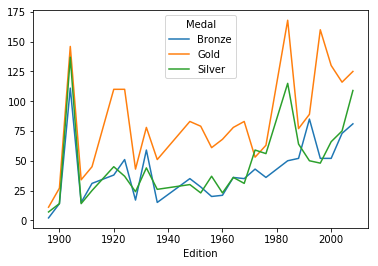

In [150]:
import matplotlib.pyplot as plt

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

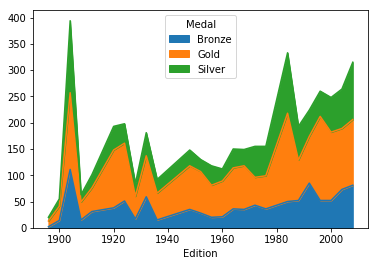

In [151]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

You may have noticed that the medals are ordered according to a **lexicographic** (dictionary) ordering: Bronze < Gold < Silver.

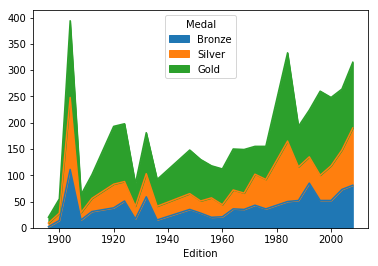

In [152]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values= medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

In [ ]:
def incident_dist(incident):
    '''A function that takes an criminal incident designator,
    (Assault, Break and Enter, Homicide, Robbery, Sexual Assults, Theft From Vehicle,
    Theft Of Vehicle, Theft Over $5000) and returns a histogram distribution.
    '''
    
    print('The maximum number of ' + incident + ' for any neighbourhood in Edmonton 2018 is: \n' 
          + str(nb_assess[incident].max()))
    print('\nThe neighbourhood with the most ' + incident + ' in 2018 is/are: \n' 
          + str(nb_assess[nb_assess[incident] == nb_assess[incident].max()].nb))
    
    ax = nb_assess[incident].plot(kind='hist',range=(0,nb_assess[incident].max()), bins=100, title=incident)
    ax.set_ylabel('Number of Neighbourhoods')
    ax.set_xlabel('Number of Incidents in 2018')
plt.show()